In [ ]:
if method == 'crossed_':
            cross_offsets = []
            for i in range(len(df.columns)):
                for j in range(len(df.columns)):
                    seconds = 5
                    fps = 30
                    rs = [self.crosscorr(df[df.columns[i]],df[df.columns[j]], lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
                    offset = np.floor(len(rs)/2)-np.argmax(rs)
                    cross_offsets.append(offset)
            cross_offsets = np.array(cross_offsets)
            cross_offsets = cross_offsets/max(cross_offsets)
            crossed_offset_matrix = cross_offsets.reshape((df.shape[1],df.shape[1]))
            crossed_df = pd.DataFrame(crossed_offset_matrix , columns=(df.columns)).set_index(df.columns)
            df_cc = crossed_df


            # apply corr coeff threshold and create new df
            list_symbols = df_cc.columns.to_list()
            list_from = []
            list_to = []
            list_corr_coeff = []
            for i , sym_from in enumerate(list_symbols):
                for sym_to in list_symbols:
                    if sym_from != sym_to:
                        corr_coef = df_cc.loc[sym_from, sym_to]
                        if abs(corr_coef) < threshold:
                            list_from.append(sym_from)
                            list_to.append(sym_to)
                            list_corr_coeff.append(corr_coef)

            # create df for constructing graph
            df_graph = pd.DataFrame({'from':list_from, 'to':list_to, 
                                    'corr coeff':list_corr_coeff})

            G_crossed = nx.from_pandas_edgelist(df_graph, 'from', 'to')
            return G_crossed

In [1]:
from ned import Net_moduls
import networkx as nx
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tehran_index = pd.read_excel('../Data/Tehran_Indexes_Price_NoRegime.xlsx').set_index('date')

In [4]:
tehran_df = pd.read_excel('../Data/Tehran_Indexes_NormedReturned_Regimed.xlsx').set_index('date')
tehran_df = tehran_df[tehran_df.columns[:-12]]

In [5]:
def crosscorr(datax, datay, lag=0, wrap=False):
    if wrap:
        shiftedy = datay.shift(lag)
        transfer_entropy_dfshiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else:
        return datax.corr(datay.shift(lag))

In [6]:
df = tehran_df[-300:]
cross_offsets = []
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        seconds = 5
        fps = 30
        rs = [crosscorr(df[df.columns[i]],df[df.columns[j]], lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
        offset = np.floor(len(rs)/2)-np.argmax(rs)
        cross_offsets.append(offset)

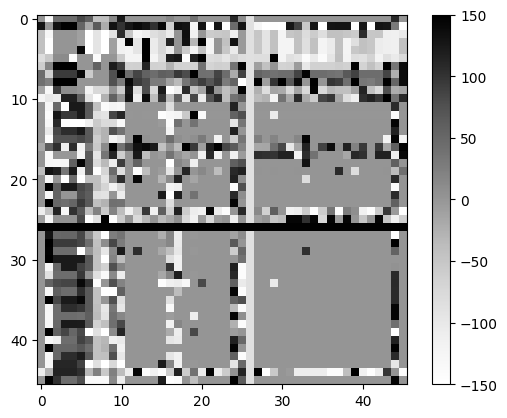

In [7]:
cross_offsets = np.array(cross_offsets)
plt.imshow(cross_offsets.reshape((df.shape[1],df.shape[1])), cmap='Greys')
plt.colorbar()

([<matplotlib.axis.XTick at 0x17d2ebb50>,
 [Text(0, 0, 'index'),
  Text(1, 0, 'Brent Oil'),
  Text(2, 0, 'Coin'),
  Text(3, 0, 'Euro'),
  Text(4, 0, 'USD'),
  Text(5, 0, 'CPI'),
  Text(6, 0, 'HOUSE'),
  Text(7, 0, 'M1'),
  Text(8, 0, 'M2'),
  Text(9, 0, 'GDP'),
  Text(10, 0, 'Gold'),
  Text(11, 0, 'Agriculture')])

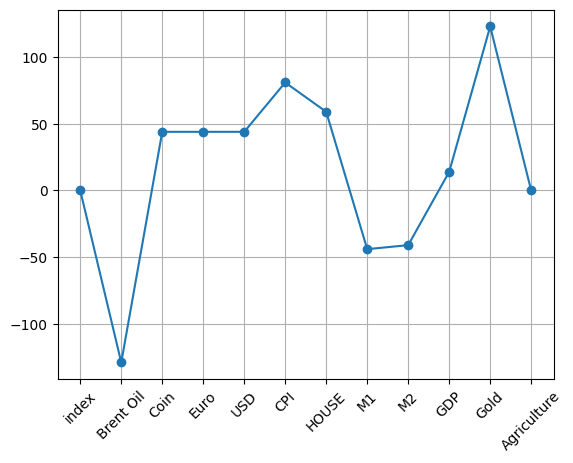

In [8]:
plt.plot(cross_offsets.reshape((df.shape[1],df.shape[1]))[0,:12], 'o-')
plt.grid()
plt.xticks(range(12),df.columns[:12], rotation=45)

([<matplotlib.axis.XTick at 0x17d7bf1d0>,
 [Text(0, 0, 'index'),
  Text(1, 0, 'Brent Oil'),
  Text(2, 0, 'Coin'),
  Text(3, 0, 'Euro'),
  Text(4, 0, 'USD'),
  Text(5, 0, 'CPI'),
  Text(6, 0, 'HOUSE'),
  Text(7, 0, 'M1'),
  Text(8, 0, 'M2'),
  Text(9, 0, 'GDP'),
  Text(10, 0, 'Gold'),
  Text(11, 0, 'Agriculture')])

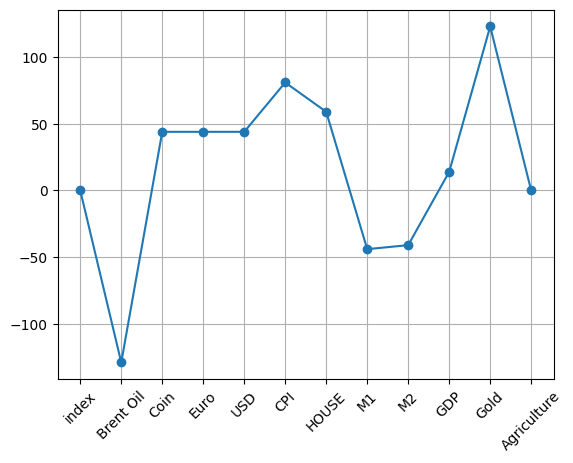

In [9]:
plt.plot(cross_offsets.reshape((df.shape[1],df.shape[1]))[0,:12], 'o-')
plt.grid()
plt.xticks(range(12),df.columns[:12], rotation=45)

In [10]:
tehran_df_shifted = tehran_df.copy()

In [56]:
cross_offsets.reshape((df.shape[1],df.shape[1]))[0,:11]

array([   0., -129.,   44.,   44.,   44.,   81.,   59.,  -44.,  -41.,
         14.,  123.])

In [11]:
for i in range(11):
    if i!= 7 and i!=8 :
        tehran_df_shifted[tehran_df_shifted.columns[i]] = tehran_df_shifted[tehran_df_shifted.columns[i]].shift(int(cross_offsets.reshape((df.shape[1],df.shape[1]))[0,:11][i]))

In [13]:
resulted_df = tehran_df_shifted[tehran_df_shifted.columns[:12]].iloc[-300:]

In [14]:
opec_df = pd.read_excel('../Data/opec.xlsx').set_index('date')

In [51]:
opec_df.index

DatetimeIndex(['2003-01-02', '2003-01-03', '2003-01-06', '2003-01-07',
               '2003-01-08', '2003-01-09', '2003-01-10', '2003-01-13',
               '2003-01-14', '2003-01-15',
               ...
               '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10',
               '2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16',
               '2023-11-17', '2023-11-20'],
              dtype='datetime64[ns]', name='date', length=5387, freq=None)

In [57]:
opec_df_period = opec_df.iloc[2130:4693+129]

In [61]:
opec_df_period[-len(tehran_df)-1:]

,opec
date,
2012-05-24,103.49
2012-05-25,104.59
2012-05-28,105.01
2012-05-29,105.13
2012-05-30,102.75
...,...
2021-09-08,71.17
2021-09-09,71.82
2021-09-10,71.98


In [62]:
def price_return(p):
        pr = []
        for i in range(1, len(p)):
            pr.append(np.log(p[i])-np.log(p[i-1]))
        return pr

In [63]:
opec_df_2021so_on = np.array(price_return(opec_df_period[-len(tehran_df)-1:]['opec'].values))
opec_df_2021so_on -= np.mean(opec_df_2021so_on)
opec_df_2021so_on /= np.std(opec_df_2021so_on)

In [17]:
# opec_df_2021so_on = np.array(price_return(opec_df[4693:]['opec'].values))
# opec_df_2021so_on -= np.mean(opec_df_2021so_on)
# opec_df_2021so_on /= np.std(opec_df_2021so_on)

In [18]:
# half_oil = tehran_df_shifted[-300:]['Brent Oil'].dropna().values

In [19]:
# first = []
# second = []
# for i in range(len(half_oil)):
#     first.append(half_oil[i])

In [20]:
# for i in range(300-len(half_oil)):
#     first.append(opec_df_2021so_on[i])

In [22]:
last300_tehran_df_shifted = tehran_df_shifted[-300:]

In [23]:
last300_tehran_df_shifted['Brent Oil'] = first

/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_1177/6601695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last300_tehran_df_shifted['Brent Oil'] = first


In [69]:
tehran_df_shifted['Brent Oil'] = opec_df_2021so_on

In [72]:
tehran_df_shifted.dropna().to_csv('Tehran_df_shifted.csv')